In [3]:
## Import Dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
import requests
from pprint import pprint
from datetime import datetime, timedelta
import numpy as np

import yfinance as yf
## https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy#holdings

sp500_df = pd.read_csv('s&p500.csv')

In [18]:
## 2.Ten year Return Analysis

In [19]:
#read the 10 years data
ten_year_df = pd.read_csv('../output_data/tenyears.csv')
del ten_year_df["Unnamed: 0"]
ten_years_df

NameError: name 'ten_years_df' is not defined

In [157]:
stocks_df = ten_years_df.sort_values('10 Years Return(%)', ascending=False).head(50)
stocks_df.head(10)

,Ticker,Name,10 Years Return(%),Weight,Sector
244,ENPH,Enphase Energy Inc.,6746.511610,0.088276,Information Technology
9,TSLA,Tesla Inc.,5179.143589,1.264166,Consumer Discretionary
3,NVDA,NVIDIA Corporation,4554.139952,1.923625,Information Technology
151,DXCM,DexCom Inc.,3161.050974,0.138081,Health Care
49,AMD,Advanced Micro Devices Inc.,2439.999916,0.408285,Information Technology
47,NFLX,Netflix Inc.,2068.007532,0.423701,Communication Services
365,EPAM,EPAM Systems Inc.,1669.654331,0.046344,Information Technology
388,PAYC,Paycom Software Inc.,1633.575442,0.041894,Information Technology
20,AVGO,Broadcom Inc.,1624.113474,0.766771,Information Technology
308,MPWR,Monolithic Power Systems Inc.,1451.601453,0.061209,Information Technology


In [183]:
# Double check the result (the return is SO HIGH)
stocks_df3.loc[stocks_df3["Symbol"]=="ENPH"]

,Symbol,Highest,Lowest,2013 Open Price,2022 Close Price,10 Years Return(%)
244,ENPH,3.87,264.959991,3.87,264.959991,6746.51161


In [162]:
# count higher return stocks in different sectors
numbers = stocks_df.groupby("Sector").count()["Ticker"]
top_50_stocks = pd.DataFrame({"stocks number":numbers})
top_50_stocks = top_50_stocks.sort_values("stocks number", ascending=False)

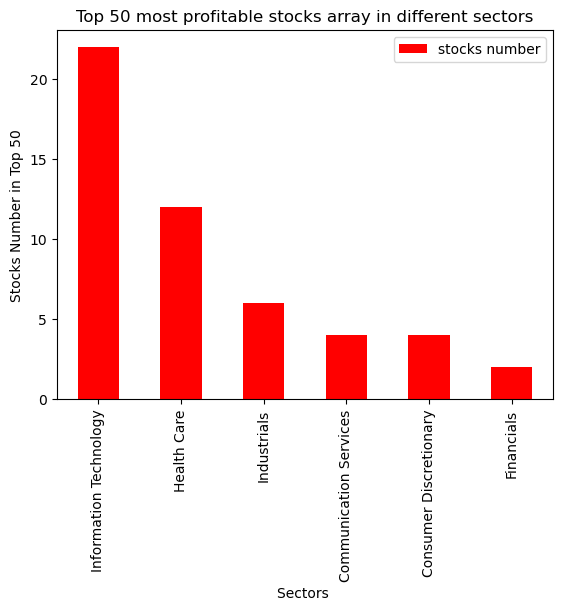

In [163]:
#Ploting the counting result 
pie_plot=top_50_stocks.plot.bar(y="stocks number",color='r')

# Set labels
plt.title("Top 50 most profitable stocks array in different sectors")
plt.xlabel("Sectors ")
plt.ylabel("Stocks Number in Top 50")
plt.show()

In [167]:
# Calculate the average 10 year return of each sector
sector_teny_grouped=ten_years_df.groupby("Sector")
sector_teny_return = sector_teny_grouped["10 Years Return(%)"].mean()
sector_return_df = pd.DataFrame(sector_teny_return)
sector_df =sector_return_df.sort_values("10 Years Return(%)", ascending=False)
sector_df

,10 Years Return(%)
Sector,
Information Technology,684.161566
Health Care,404.576149
Consumer Discretionary,311.603026
Communication Services,304.781282
Industrials,257.150670
Financials,234.460341
Consumer Staples,153.043137
Materials,140.282962
Utilities,112.403582


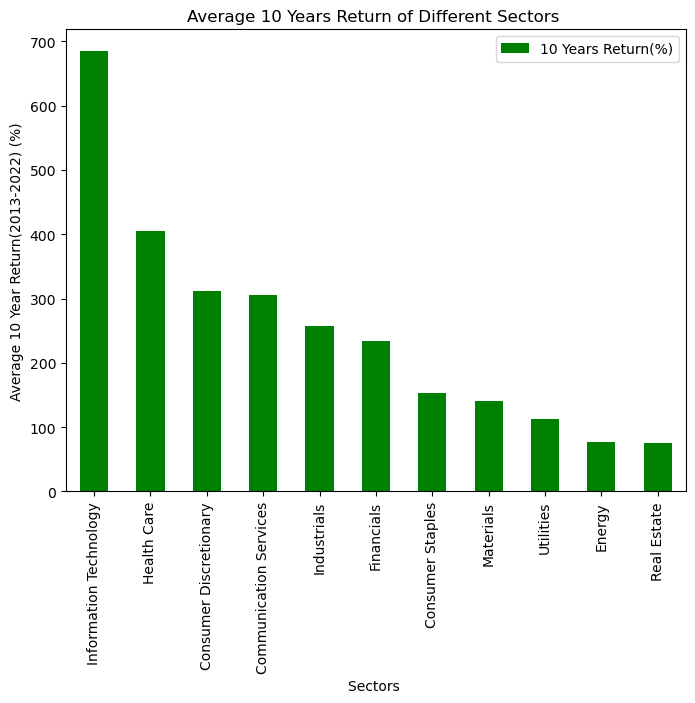

In [169]:
sector_df.plot(kind="bar",color='g', figsize=(8,6))
plt.title("Average 10 Years Return of Different Sectors ")
plt.xlabel("Sectors ")
plt.ylabel("Average 10 Year Return(2013-2022) (%)")
plt.show()

In [ ]:
# top 3 stocks with highest 10 year return

In [172]:
# find the top 3 weighted company of each sector

# Custom function to get the top 3 rows in each group based on the '10 Years Return' column
def top_3(group):
    return group.sort_values(by="10 Years Return(%)", ascending=False).head(3)

top_3_10year_group =ten_years_df.groupby('Sector').apply(top_3)
top_3_ax = top_3_10year_group[["Ticker","10 Years Return(%)"]]
top_3_ax.reset_index(inplace=True)
del top_3_ax["level_1"]

top_3_ax

,Sector,Ticker,10 Years Return(%)
0,Communication Services,NFLX,2068.007532
1,Communication Services,TTWO,828.074820
2,Communication Services,EA,727.217309
3,Consumer Discretionary,TSLA,5179.143589
4,Consumer Discretionary,ORLY,830.983891
5,Consumer Discretionary,CZR,775.789442
6,Consumer Staples,STZ,544.645327
7,Consumer Staples,MNST,467.206709
8,Consumer Staples,DG,454.492233
9,Energy,FANG,602.877725


In [173]:
# get a colors list
colors_to_repeat = ['r', 'g', 'b','c','m','y','k','orange','gray','tan','navy']

color_list = []

for color in colors_to_repeat:
    color_list.extend([color] * 3)

In [174]:

bar_value = top_3_ax["10 Years Return(%)"]
x_axis = np.arange(len(top_3_ax["Ticker"]))
color = color_list
tick_locations = [value for value in x_axis]
tick_name = top_3_ax["Ticker"]

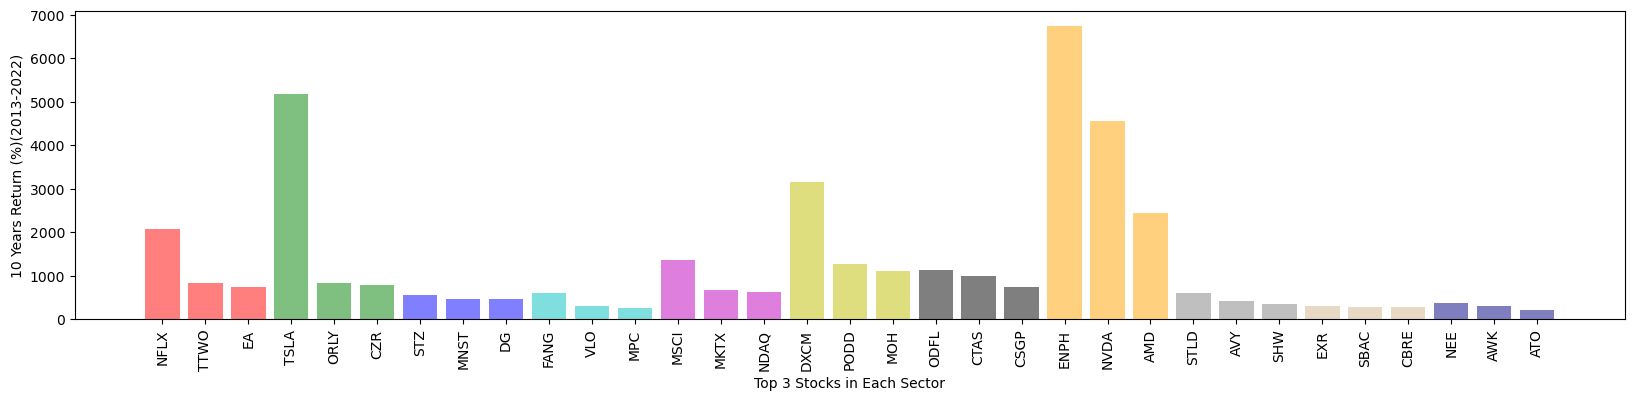

In [175]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, bar_value, color=color_list, alpha=0.5, align="center")
plt.xticks(tick_locations, tick_name)
plt.xticks(rotation=90)

plt.xlabel("Top 3 Stocks in Each Sector")
plt.ylabel("10 Years Return (%)(2013-2022)")
plt.show()